In [1]:
# imports
import pandas as pd # for using pandas data frames
import numpy as np # for converting numpy array to data frame

In [2]:
# imports for graphs and plotting
#get_ipython().system('pip install ggplot')
#get_ipython().system('pip install plotnine')

In [3]:
from plotnine import ggplot, aes, geom_line

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10

In [4]:

# reading from csv data file as pandas data frame
df = pd.read_csv(r'cleaned_data02.csv')

# checking the data (rows 1-10)
print(df[1:10])

   Unnamed: 0      country  year  Intentional_homicides_per100k  \
1           1  Afghanistan  2010                       3.368110   
2           2  Afghanistan  2011                       4.087337   
3           3  Afghanistan  2012                       6.251328   
4           4  Afghanistan  2015                       9.783922   
5           5  Afghanistan  2016                       6.551163   
6           6  Afghanistan  2017                       6.678401   
7           7  Afghanistan  2018                       6.655561   
8           8      Albania  2000                       4.186312   
9           9      Albania  2001                       7.029425   

   Suicide_mortality_rate_per100k        GDP_us  GDP_per_capita  \
1                             4.3  1.585668e+10     1710.575411   
2                             4.1  1.780511e+10     1699.488110   
3                             4.0  1.990732e+10     1914.774228   
4                             4.0  1.913421e+10     2087.3053

In [8]:
# creating a data frame from raw data with headings
#data_frame = pd.DataFrame(np.array(df), columns = ['country', 'year', 'Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k', 'GDP_us', 'GDP_per_capita', 'adminregion', 'incomeLevel'])
#data_frame.head()

In [ ]:
# removing blank rows from data frame, setting threshold of 1 - anything with 1 NaN will be removed
newdf = data_frame = data_frame.dropna(thresh=10)

newdf.head()

In [ ]:
# checking the size of the data set
newdf.shape

(1487, 10)

In [10]:
# saving to new csv
#newdf.to_csv('cleaned_data02.csv')

 We have now cut our data from 13,000+ rows down to 1,411 after removing any rows which were mostly blank (NaN) rows. Our reasoning for this was due to missing values would cause issues when implementing any machine learning modules.
 
Data Exploration
 We now want to create some graphs to help visualize the current data

In [ ]:
year = newdf['year']
homicides = newdf['Intentional_homicides_per100k']

plt.bar(year, homicides, color="red")

plt.xlabel('Year')

plt.ylabel('Homicides')

plt.title('Increase/Decrease in Homicides')

plt.xticks(rotation=90)

plt.show()

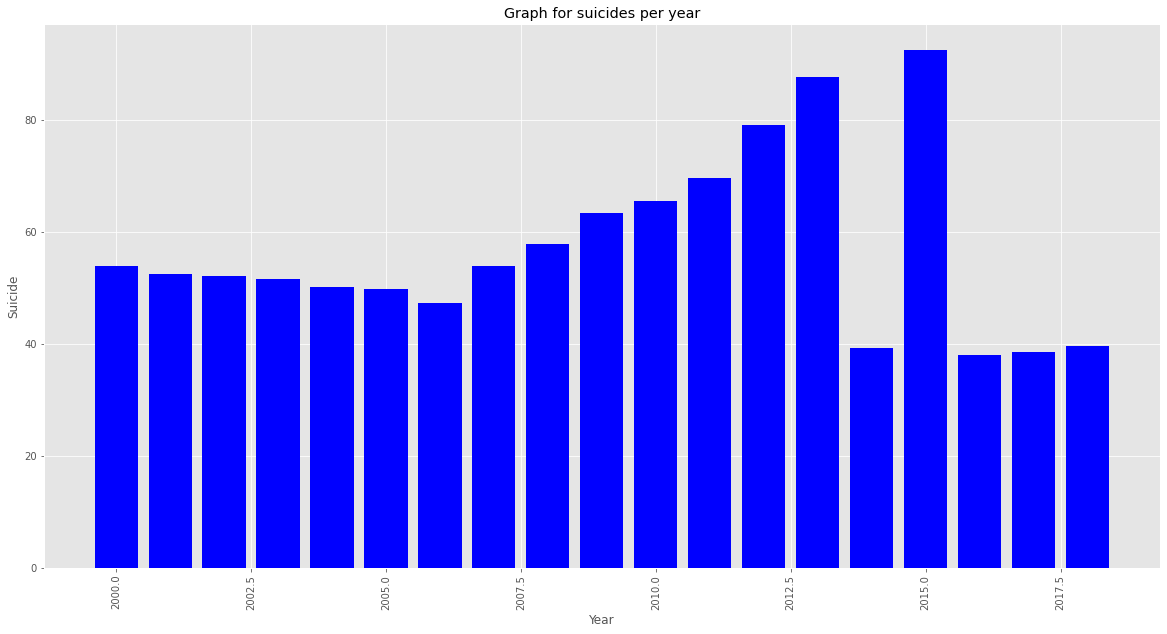

In [ ]:
year = newdf['year']
Suicide = newdf['Suicide_mortality_rate_per100k']

plt.bar(year, Suicide, color="blue")

plt.xlabel('Year')

plt.ylabel('Suicide')

plt.title('Graph for suicides per year')

plt.xticks(rotation=90)

plt.show()

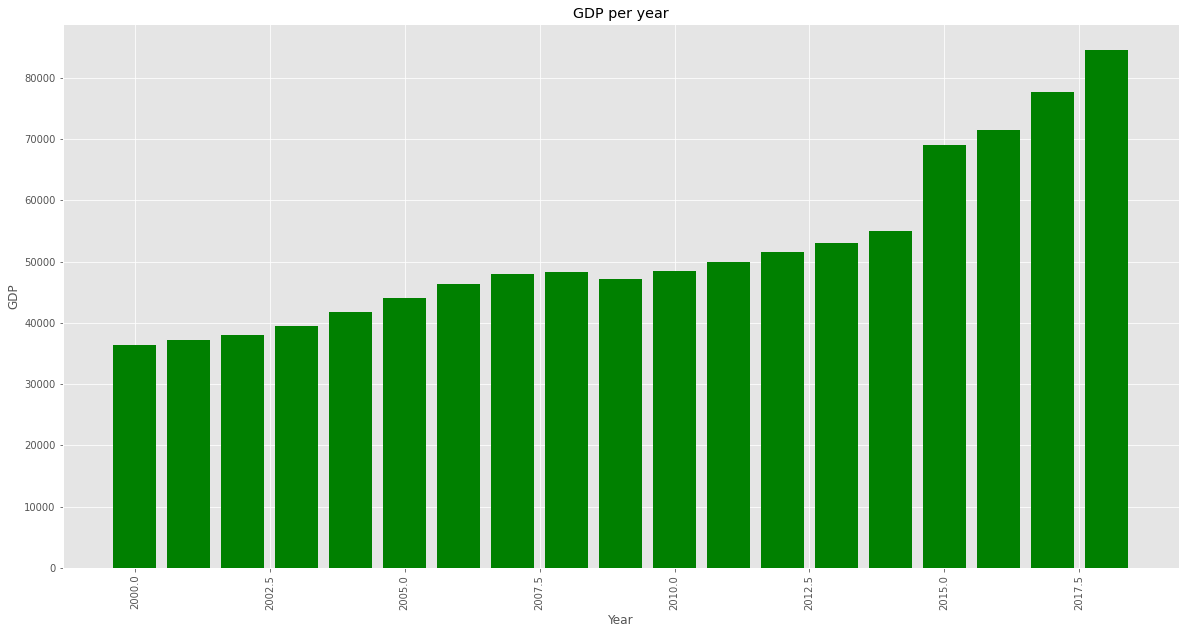

In [ ]:
year = newdf['year']
GDP = newdf['GDP_per_capita']

plt.bar(year, GDP, color="green")

plt.xlabel('Year')

plt.ylabel('GDP')

plt.title('GDP per year')

plt.xticks(rotation=90)

plt.show()

Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

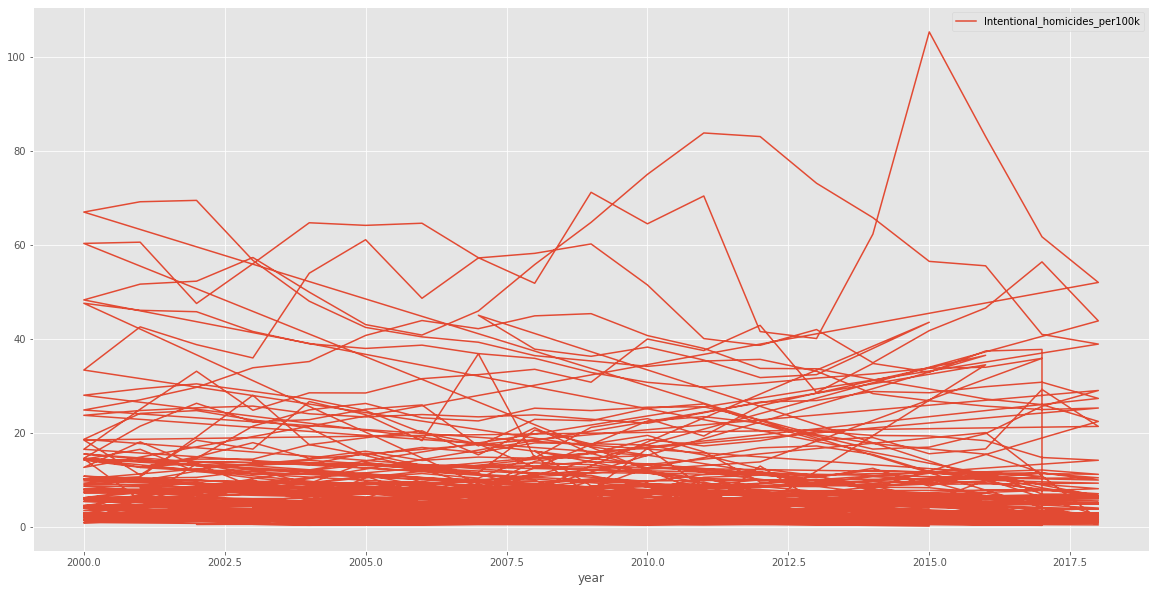

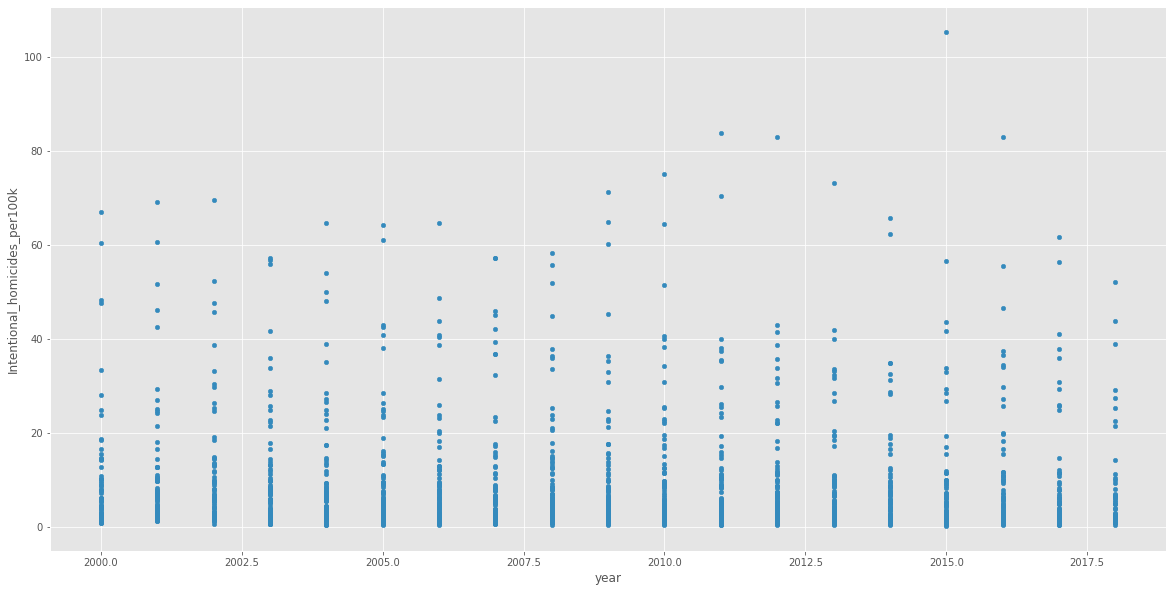

In [ ]:
regression = pd.read_csv('cleaned_data02.csv')
regression.shape
regression.head(10)
regression.plot('year', 'Intentional_homicides_per100k')
regression.plot.scatter('year', 'Intentional_homicides_per100k')
x_train, x_test, y_train, y_test = train_test_split(regression.year, regression.Intentional_homicides_per100k, test_size = 0.2)
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
preds
residuals = preds - y_test
#plt.hist(residuals)
#mean_squared_error(y_test,preds)**0.5




(array([  1.,   1.,   3.,   2.,   4.,   9.,   7.,  21.,  35., 215.]),
 array([-73.71852136, -65.32492325, -56.93132515, -48.53772704,
        -40.14412894, -31.75053083, -23.35693272, -14.96333462,
         -6.56973651,   1.82386159,  10.2174597 ]),
 <BarContainer object of 10 artists>)

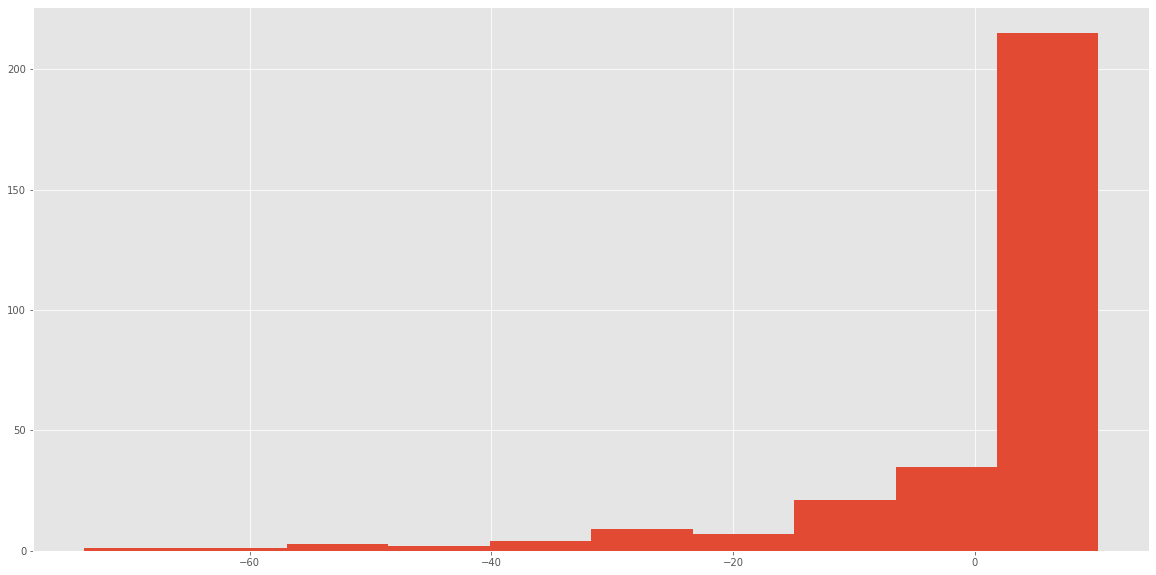

In [ ]:
plt.hist(residuals)

In [ ]:
mean_squared_error(y_test, preds) ** 0.5

12.90960637999418

The mean squared error tells us how far off the line of best fit the regressed predictions are.

Mean Squared Error = 12.691 

In [ ]:
dataset = pd.read_csv("cleaned_data02.csv")
dataset.head()

,Unnamed: 0,country,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,0,Afghanistan,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
1,1,Afghanistan,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
2,2,Afghanistan,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
3,3,Afghanistan,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
4,4,Afghanistan,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income


In [ ]:
dataset.shape



(1487, 9)

In [ ]:
dataset.isna().sum()
dataset.duplicated().any()

False

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


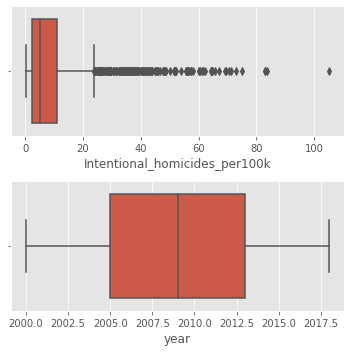

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(2, figsize = (5,5))

plt1 = sns.boxplot(dataset['Intentional_homicides_per100k'], ax = axs[0])

plt2 = sns.boxplot(dataset['year'], ax = axs[1])

plt.tight_layout()

<AxesSubplot:xlabel='Count', ylabel='GDP_us'>

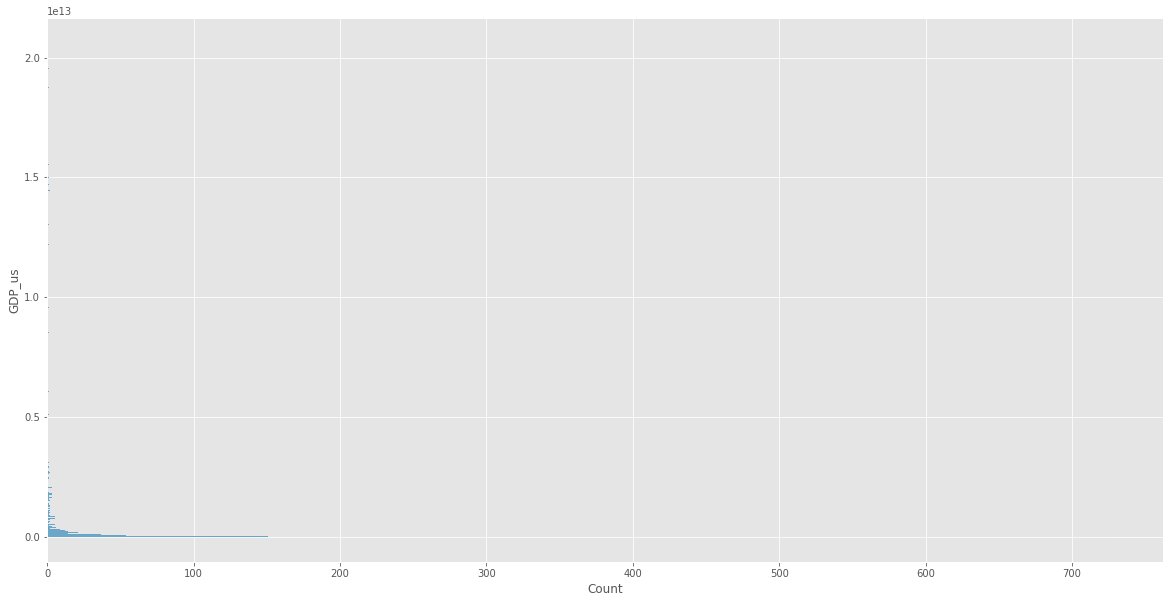

In [ ]:
sns.histplot(data=dataset, y='GDP_us')

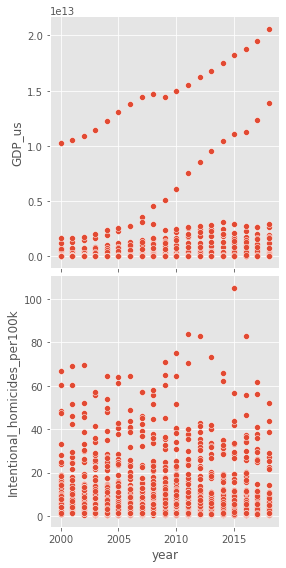

In [ ]:
sns.pairplot(dataset, x_vars='year', y_vars=['GDP_us', 'Intentional_homicides_per100k'], height=4, aspect=1, kind='scatter')

plt.show()

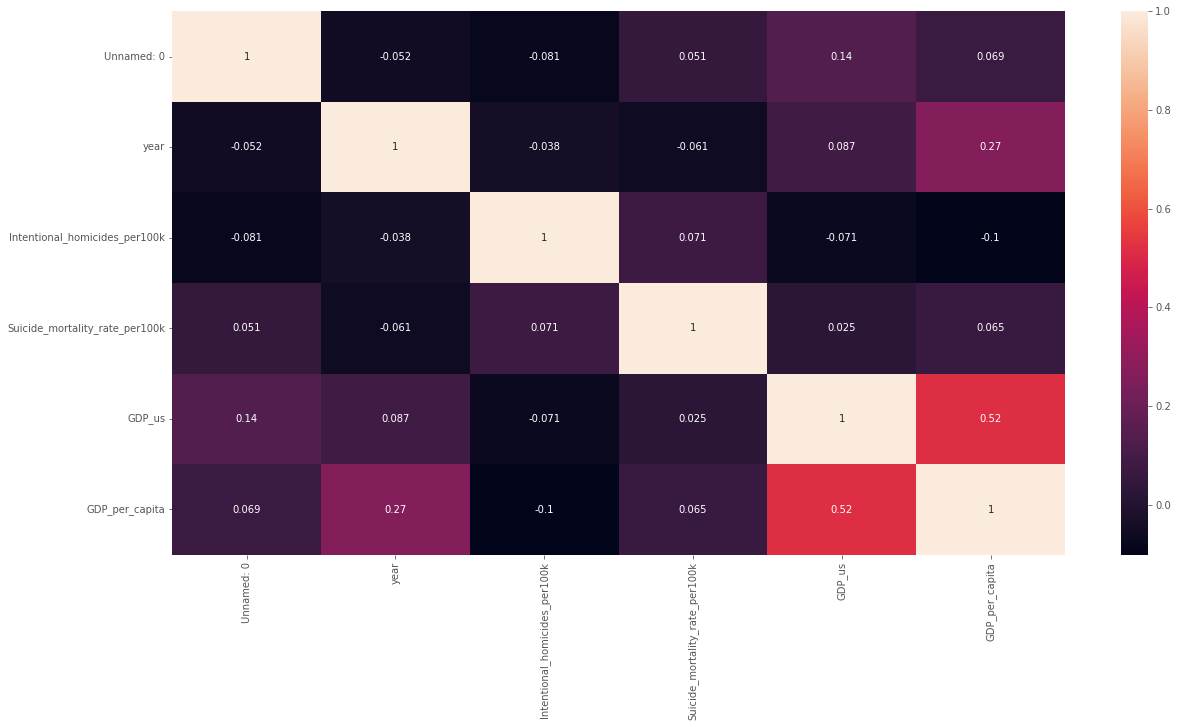

In [ ]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

The above Pearson correlation matrix uses multiple independent variables with the dependent variable being 'year'.

## Ho : The rates of homicide per 100k have not rapidly changed from 2000-2018

## H1 : There has been a rapid change (increase or decrease) in homicide rates from 2000-2018

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#Setting the value for X and Y
x = dataset[['year']]
y = dataset['Intentional_homicides_per100k']



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
slr = LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Printing the model coefficients

print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  157.2275782655213
Coefficient: [-0.07325798]


In [ ]:
print('Regression Equation: year = 157.22 + -0.07325798 * N of homicides')

Regression Equation: year = 157.22 + -0.07325798 * N of homicides


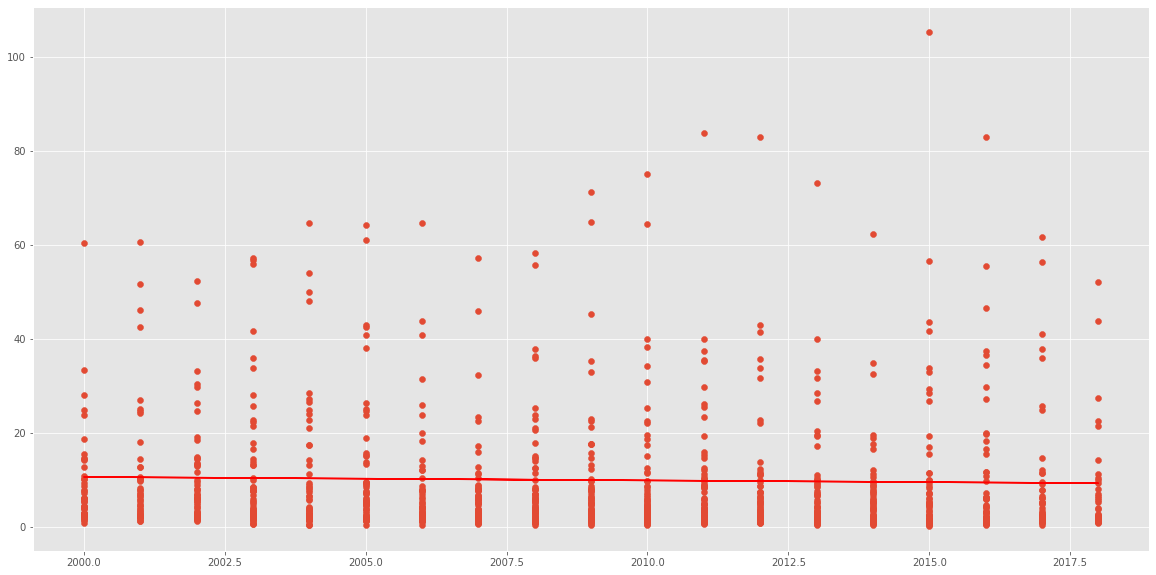

In [ ]:
#Line of best fit

plt.scatter(x_train, y_train)
plt.plot(x_train, 157.22 + -0.07325798*x_train, 'r')
plt.show()

In [ ]:
#Prediction of Test and Training set result  

y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [ ]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 9.90577581  9.5394859   9.68600186  9.97903379  9.97903379 10.05229177
 10.63835563  9.75925984 10.3453237  10.12554975 10.3453237   9.46622791
 10.19880774 10.63835563 10.27206572 10.12554975 10.12554975  9.83251783
 10.12554975 10.3453237   9.61274388 10.49183967 10.3453237   9.46622791
  9.68600186 10.71161361 10.3453237   9.68600186 10.12554975 10.19880774
 10.71161361 10.3453237   9.97903379  9.39296993 10.3453237   9.46622791
 10.56509765  9.68600186 10.63835563 10.41858168  9.68600186 10.19880774
  9.5394859  10.19880774 10.19880774 10.05229177  9.5394859  10.12554975
  9.39296993  9.46622791 10.27206572 10.41858168  9.5394859   9.75925984
  9.75925984 10.12554975 10.05229177  9.90577581 10.27206572 10.3453237
 10.71161361  9.46622791 10.3453237   9.46622791 10.27206572  9.68600186
 10.05229177  9.68600186  9.39296993  9.61274388 10.05229177  9.90577581
  9.83251783 10.12554975 10.41858168 10.27206572 10.27206572 10.19880774
 10.56509765 10.27206572  9

In [ ]:
#Actual value and the predicted value

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
258,0.559635,9.905776
57,6.033310,9.539486
225,28.849832,9.686002
1335,0.961714,9.979034
499,4.561981,9.979034
...,...,...
739,10.502697,9.905776
561,1.148705,9.466228
531,3.745809,9.905776
1098,8.727260,9.832518


In [ ]:
# Predict avg homicides per 100k for any given year
slr.predict([[2009]])

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([10.05229177])

In [ ]:
# print the R-squared value for the model

from sklearn.metrics import accuracy_score

print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 0.13


In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 8.622248557264948
Mean Square Error: 159.225969429557
Root Mean Square Error: 12.618477302335533


In [ ]:
import statsmodels.api as sm

# adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [ ]:
# fitting the regression line using Ordinary Least Square
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
# Printing the params
lr.params

const    157.227578
year      -0.073258
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Intentional_homicides_per100k   R-squared:                       0.001
Model:                                       OLS   Adj. R-squared:                 -0.000
Method:                            Least Squares   F-statistic:                    0.8272
Date:                           Thu, 31 Mar 2022   Prob (F-statistic):              0.363
Time:                                   17:32:17   Log-Likelihood:                -4176.1
No. Observations:                           1040   AIC:                             8356.
Df Residuals:                               1038   BIC:                             8366.
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.2276    161.818      0.972      0.331    -160.300     474.755
year          -0.0733      0.081     -0.909      0.363      -0.231       0.085
==============================================================================
Omnibus:                      617.931   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4695.156
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      11.860   Cond. No.                     7.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The main statistics we are concerned with to check a viable model
### The coefficiens and P-Value (sig. value)
### R-Squared Value
### F-Statistic and its significance

#### Our coefficient for the 'Year' is -0.0733 and its corresponding P-Value is > 0.05 therefore we can accept the null hypothesis

## R-Sqaured Value is 0.001 which means 01% of the years variance can be explained by the 'homicides per 100k'.

## The F-Statistic has a P-Value of > 0.05 which tells us that the model fit is not statistically significant.

## From the parameters we produced the values of the intercept and the slope for the straight line. The equation of the line is
 
 ### year = 157.22 + -0.07 * 2017


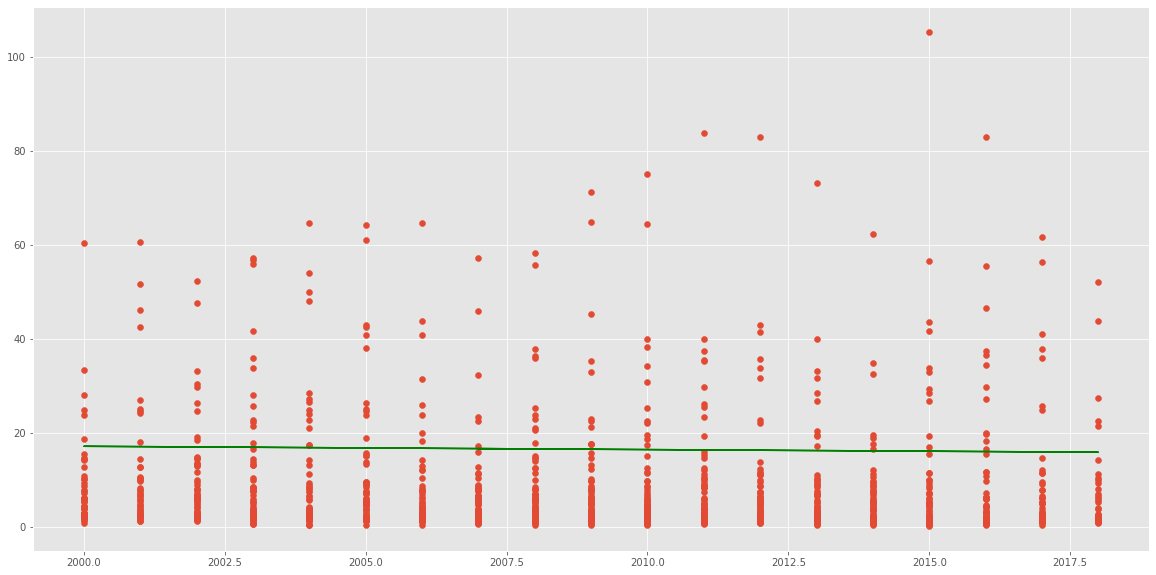

In [ ]:
# visualize the regression line
plt.scatter(x_train, y_train)
plt.plot(x_train, 157.22 + -0.07*x_train, 'g')
plt.show()

In [ ]:
datasetMLR = pd.read_csv("cleaned_data02.csv")
datasetMLR.head()
x = datasetMLR[['Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k']]
y = datasetMLR['GDP_us']
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)
mlr= LinearRegression()  
mlr.fit(x_train, y_train)

#Printing the model coefficients
print(mlr.intercept_)

# pair the feature names with the coefficients
list(zip(x, mlr.coef_))

#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_mlr))

#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

mlr_diff

513500165592.6621
Prediction for test set: [ 5.47992740e+11  4.90627345e+11  2.29077764e+11  5.26681973e+11
  5.06599341e+11  5.12997828e+11  5.19492740e+11  6.77098344e+10
  5.44008425e+11  3.83290963e+11  5.20519458e+11  5.09673325e+11
  5.01890917e+11  4.46092738e+11  4.59338284e+11  6.14181506e+11
  5.14313565e+11  4.71090076e+11  5.56468567e+11  5.92518502e+11
  4.88248048e+11  4.93959714e+11  5.26848264e+11  5.50649537e+11
  5.34635858e+11  3.41345561e+11  5.10617090e+11  5.39551750e+11
  5.16220396e+11  9.80625703e+10  5.20161632e+11  4.32957966e+11
  5.82874549e+11  2.58921215e+11  5.99359830e+11  4.97881955e+11
  5.18149461e+11  5.30362197e+11  4.63082332e+11  5.11379058e+11
  5.46556734e+11  5.09606480e+11  5.41752788e+11  4.57375859e+11
  4.99928390e+11 -1.28152941e+11  2.55608058e+11  4.84892352e+11
  4.90799203e+11  2.36120686e+11  2.85167760e+11  4.92347953e+11
  4.96325765e+11  4.43582183e+11  5.60045664e+11  5.67511473e+11
  4.75874051e+11  5.31945055e+11  4.91711102e+1

,Actual value,Predicted value
258,1.208030e+10,5.479927e+11
57,5.575310e+11,4.906273e+11
225,2.456040e+12,2.290778e+11
1335,3.668400e+08,5.266820e+11
499,1.224351e+10,5.065993e+11
...,...,...
739,1.817052e+08,5.576508e+11
561,1.350177e+09,5.385170e+11
531,7.786559e+08,4.815673e+11
1098,2.619210e+11,4.310858e+11


In [ ]:
#Predict for any value
mlr.predict([[56, 55]])

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([1.88025651e+11])

In [ ]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
# print the R-squared value for the model
print('R squared value of the model: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared value of the model: 0.58
Mean Absolute Error: 681718217215.2942
Mean Square Error: 3.343347702633185e+24
Root Mean Square Error: 1828482349554.7297


New test

In [ ]:
df2 = pd.read_csv('cleaned_data02.csv')
df2

,Unnamed: 0,country,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,0,Afghanistan,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
1,1,Afghanistan,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
2,2,Afghanistan,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
3,3,Afghanistan,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
4,4,Afghanistan,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income
...,...,...,...,...,...,...,...,...,...
1482,1482,Zimbabwe,2004,11.281282,14.2,5.805598e+09,1762.520649,Sub-Saharan Africa (excluding high income),Lower middle income
1483,1483,Zimbabwe,2005,11.178553,14.0,5.755215e+09,1705.569979,Sub-Saharan Africa (excluding high income),Lower middle income
1484,1484,Zimbabwe,2006,8.819056,14.4,5.443896e+09,1685.362389,Sub-Saharan Africa (excluding high income),Lower middle income
1485,1485,Zimbabwe,2010,5.599427,21.5,1.204166e+10,1830.827333,Sub-Saharan Africa (excluding high income),Lower middle income


In [ ]:
df3=df2[['Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k', 'GDP_per_capita']]

In [ ]:
J = df3[['Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k']]
y = df3['GDP_per_capita']

In [ ]:
J.shape

(1487, 2)

In [ ]:
from sklearn import linear_model



In [ ]:
regr = linear_model.LinearRegression()
regr.fit(J, y)

LinearRegression()

In [ ]:
#predict the 
predicted = regr.predict([[42.89, 6.3]])

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
predicted

array([6997.17421027])

our orediction was off by 400

Coefficient
The coefficient is a factor that describes the relationship with an unknown variable.

Example: if x is a variable, then 2x is x two times. x is the unknown variable, and the number 2 is the coefficient.

In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cleaned_data02.csv")

J = df[['Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k']]
y = df['GDP_per_capita']

regr = linear_model.LinearRegression()
regr.fit(J, y)

print(regr.coef_)

[-79.3398575   69.22322662]


In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cleaned_data02.csv")

J = df[['Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k']]
y = df['GDP_per_capita']

regr = linear_model.LinearRegression()
regr.fit(J, y)

predictedCO2 = regr.predict([[52.89, 6.3]])

print(predictedCO2)

[6203.77563523]


C:\Users\Andrew\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6997.17 was the initial prediction when using 42.89 homicides per 100k, when we add on 10 homicides to make it 52.89 we get a prediction of 6203.87. To test this we used the above equation taking the coefficient which is -79.33. The 10 represents the change in homicides. Based on the result, we can see that when this formula is used, it matches the models prediction of the GDP relative to homicides.

In [ ]:
#testing accuracy
6997.17 + (10*-79.33)

6203.87

In [ ]:
import statsmodels.api as sm

# adding a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [ ]:
# fitting the regression line using Ordinary Least Square

mlr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
# Printing the params

mlr.params

const                             5.135002e+11
Intentional_homicides_per100k    -1.085550e+10
Suicide_mortality_rate_per100k    5.135150e+09
dtype: float64

In [ ]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 GDP_us   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.131
Date:                Thu, 31 Mar 2022   Prob (F-statistic):             0.0441
Time:                        17:32:20   Log-Likelihood:                -30912.
No. Observations:                1040   AIC:                         6.183e+04
Df Residuals:                    1037   BIC:                         6.185e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           5.135e+11   9.81e+10      5.233      0.000    3.21e+11    7.06e+11
Intentional_homicides_per100k  -1.086e+10   4.54e+09     -2.389      0.017   -1.98e+10   -1.94e+09
Suicide_mortality_rate_per100k  5.135e+09    5.9e+09      0.871      0.384   -6.44e+09    1.67e+10
==============================================================================
Omnibus:                     1300.643   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108268.090
Skew:                           6.729   Prob(JB):                         0.00
Kurtosis:                      51.139   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

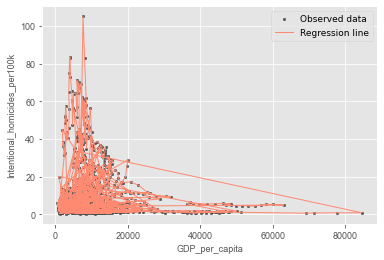

In [ ]:
# create regression plot with defaults

visuz.stat.regplot(df3, x='GDP_per_capita', y='Intentional_homicides_per100k', yhat='Intentional_homicides_per100k', show = True)# plot will be saved in same dir (reg_plot.png)show=True 
 # #if you want view the image instead of saving

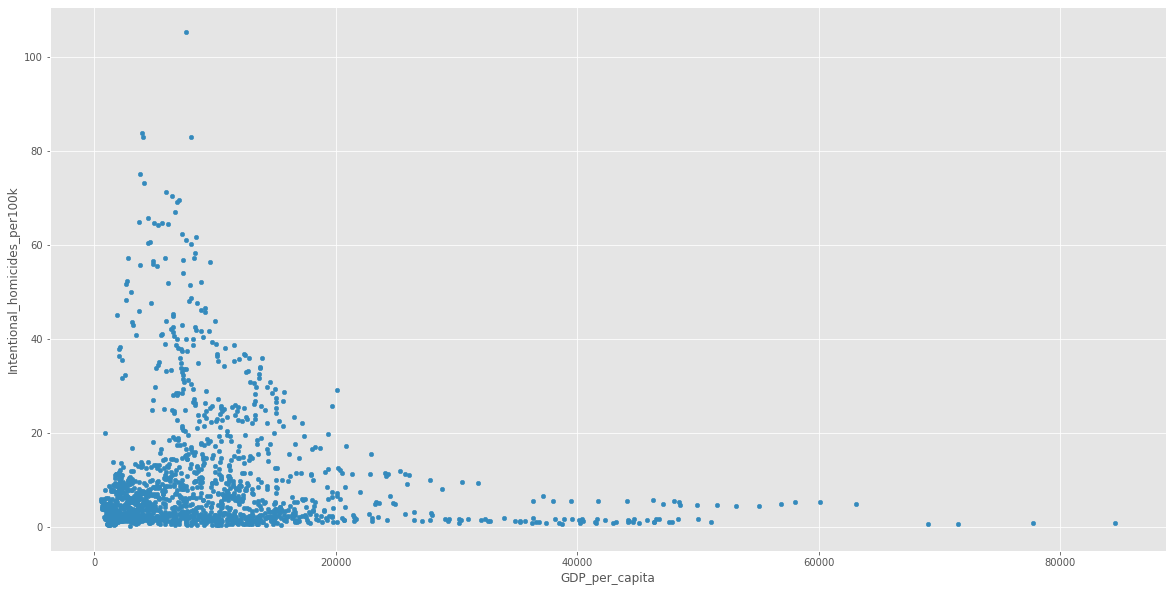

In [ ]:
regression = df3
regression.shape
regression.head(10)
#regression.plot('GDP_per_capita', 'Intentional_homicides_per100k',)
regression.plot.scatter('GDP_per_capita', 'Intentional_homicides_per100k')
x_train, x_test, y_train, y_test = train_test_split(regression.GDP_per_capita, regression.Intentional_homicides_per100k, test_size = 0.2)
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
preds
residuals = preds - y_test